> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

# Overview

I work on TMDb movies dataset to complete my investigate a dataset project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

# Questions raised before the analysis

* Which year has the highest release of movies?

* Which genres are most popular from year to year?

* Movie with longest and shortest runtime?

* Which movie has the highest or lowest Profit?

* What kinds of properties are associated with movies that have high revenues?




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


C:\Users\chrag\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Check the data types of the varibales a
#Check if there is any null  value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Have a overview of the dataset to see the parameters of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning
1. Remove duplicate data
2. Drop unused columns
3. Drop N/A data 
4. Drop inapproporiate data

### 1. Remove duplicate data

In [5]:
#Find if any duplicated data
sum(df.duplicated())

1

In [6]:
#Drop duplicate data
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

### 2. Drop unused columns

In [7]:
#Drop columns which will not be used in the analysis
df.drop(['tagline', 'overview', 'production_companies','release_date','homepage','cast', 'id','imdb_id', 'budget','revenue','keywords'],
        axis=1, inplace=True)

### 3. Drop missing data

In [8]:
#Drop N/A data(given it is hard to find the directors for the missing data)
#Check if any N/A data in the data set
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 928.1+ KB


### 4. Drop inapproporiate data
As per the parameters we find that there are bunch of budget_adj and revenue_adj for the movies are 0, which I think maybe it is teh inaccurate input making our analysis regarding revenue and budget inaccurate. However, as research 1,2,3 are not related to revenue or budget. Thus, I will use the the 1st dataframe`df` to answer my 1st, 2nd, 3rd research questions. 
In termes of question 4 and 5, I will filter the budget and revenue data with the right range and create the new dataframe`df2`to answer my research question. 

In [9]:
#Drop inaccurate data
#Filter the budget_adj and revenue_adj to create df2
df2=df.query('budget_adj>0 & revenue_adj>0')
print(df.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 928.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
genres            3853 non-null object
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
bu

In [10]:
df2.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,1.191825,109.208928,527.854399,6.168258,2001.259278,4.425038e+07,1.370974e+08
std,1.475258,19.912913,880.031643,0.795001,11.283517,4.481043e+07,2.161299e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462609,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07
50%,0.797723,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07
75%,1.368403,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,1.002441,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209157,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385471,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.717508,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which year has the highest release of movies?)

In [12]:
#Group the movies by release year and count them
y=df.groupby('release_year')['original_title'].count()
x=np.arange(1960, 2016,5)

In [13]:
#Find out the year with highest release
y.idxmax()

2014

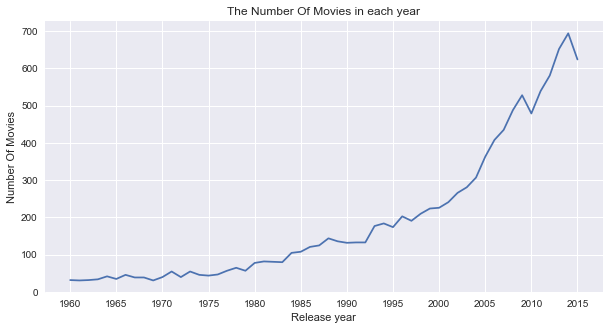

In [14]:
#Plot the figure to show each year's release amount
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1)
plt.figure(figsize=(10, 5))
plt.plot(y)
plt.title("The Number Of Movies in each year")
plt.xticks(x)
plt.xlabel('Release year')
plt.ylabel('Number Of Movies');

#### Conclusion: 
Based on the above figure and result, we can see a growing trend of the nuble of movies releasing each year and 2014 is the year has the highest release of the movies. 

### Research Question 2  (Which genres are most popular from year to year?)

In [15]:
# Use pandas.Series.str.get_dummies to return a binary indicator matrix of that particular column
dummies=df.genres.str.get_dummies(sep='|')

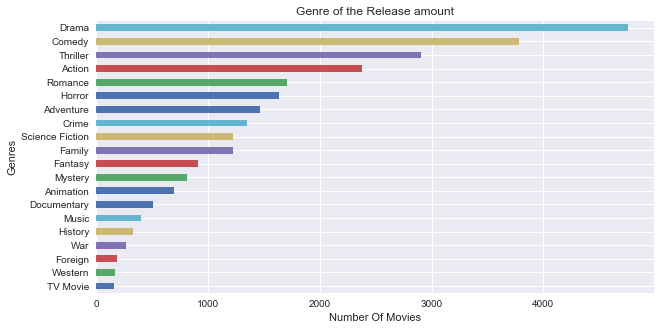

In [16]:
#Plot the number of the genre of from year to year
number_gre=dummies.sum(axis=0).astype(int).sort_values()
number_gre.plot(kind='barh', align='center',figsize=(10,5))
plt.title("Genre of the Release amount")
plt.xlabel('Number Of Movies')
plt.ylabel("Genres");

In [17]:
#Get the highest release type of the data
number_gre.idxmax()

'Drama'

#### Conclusion: 
According to the above bar plot Drama genre has the highest release of movies followed by Comedy and Thriller while the Foriegn, Western and TV movies genres have the least release.

### Research Question 3   (Movie with longest and shortest runtime?)

In [18]:
#To see the parameters of the movies'runtime
df['runtime'].describe()

count    10800.000000
mean       102.189722
std         30.783873
min          0.000000
25%         90.000000
50%         99.000000
75%        111.250000
max        900.000000
Name: runtime, dtype: float64

In [19]:
#As per the parameter, we find some 0 number of the runtime
# which I think it may be due to the inaccurate input
#Thus, we'd like to drop these input
df['runtime'].replace(0, np.NAN,inplace=True)
df3=df.dropna()
df3.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,1.077200e+04,1.077200e+04
mean,0.650643,102.455347,219.114463,5.972289,2001.265503,1.769910e+07,5.181146e+07
std,1.003319,30.379156,577.826118,0.932877,12.825332,3.441740e+07,1.451826e+08
min,0.000188,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209987,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.386176,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.718889,112.000000,147.000000,6.600000,2011.000000,2.103337e+07,3.428766e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [20]:
#Find the film with the logest runtime
df3.query('runtime==runtime.max()')

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,The Story of Film: An Odyssey,Mark Cousins,900.0,Documentary,14,9.2,2011,0.0,0.0


In [21]:
#Find the film with shortest runtime
df3.query('runtime==runtime.min()')

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
4883,0.078472,Fresh Guacamole,PES,2.0,Animation,29,7.9,2012,0.0,0.0
7905,0.647261,The Adventures of AndrÃ© and Wally B.,Alvy Ray Smith,2.0,Animation,32,5.3,1984,0.0,0.0
10550,0.306425,Luxo Jr.,John Lasseter,2.0,Animation|Family,81,7.3,1986,0.0,0.0
10754,0.002757,Bambi Meets Godzilla,Marv Newland,2.0,Animation|Comedy,12,5.6,1969,0.0,0.0


### Research Question 4 (Which movie has the highest or lowest Profit?)

In [22]:
#Add the profit column into the dataframe2
df2['profit']=df2['revenue_adj']-df2['budget_adj']

C:\Users\chrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
#Find the highest profit movied
df2.query('profit==profit.max()')

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09


In [24]:
#Find the lowest profit movie
df2.query('profit==profit.min()')

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,0.25054,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,425000000.0,11087569.0,-413912431.0


#### Conclusion:
Based on the above results, the movie`Star War` has the highest profit, which is also one of my favorite movies. The movie`The Warrior's Way` has the lowest profit, of which I never heard.

### Research Question 5 (What kinds of properties are associated with movies that have high revenues?)

To make it simple, I only would like to check the what is the relationship between the quantatitive variables with the revenue. Thus, I drop the all categorical columns.As the high correlation between revenue and profit, I also drop the profit columns.

In [25]:
#drop the all categorical and profit columns
df4=df2.drop(['original_title','director','genres', 'profit'], axis=1)

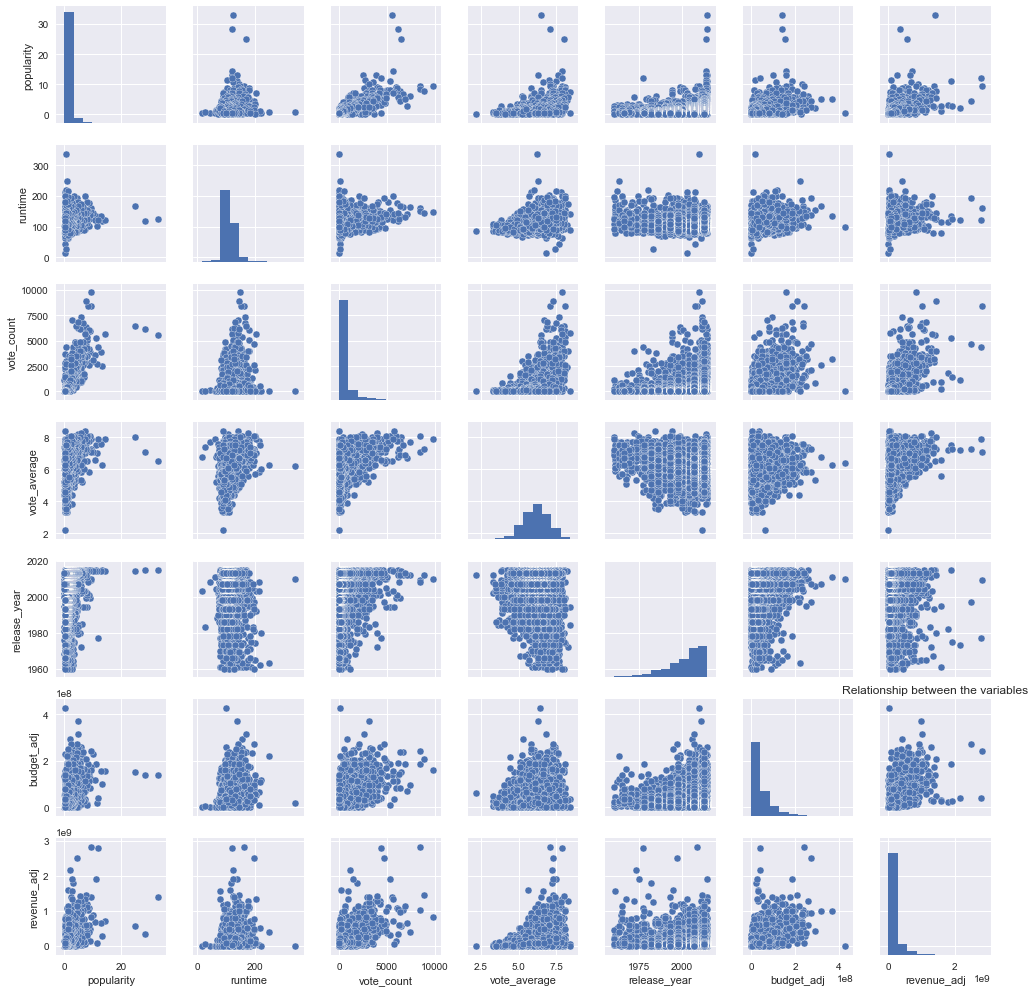

In [26]:
#Use pairplot to review the relationship between the variables
sns.pairplot(df4, size=2);
plt.title("Relationship between the variables");

From above plot we can see very weak correlation among the popularity and vote_average and the revenue. I think the reason behind that is that we have a very big data regarding the revenue_adj and budget_adj, So I will log these two varibales to see if any trend we can find. 

In [27]:
#Log the data
df2['log_rev']=np.log(df2['revenue_adj'])
df2['log_bud']=np.log(df2['budget_adj'])
#We drop the original revenue and budget data
df5=df2.drop(['original_title','director','genres', 'profit','revenue_adj','budget_adj'], axis=1)

C:\Users\chrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\chrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


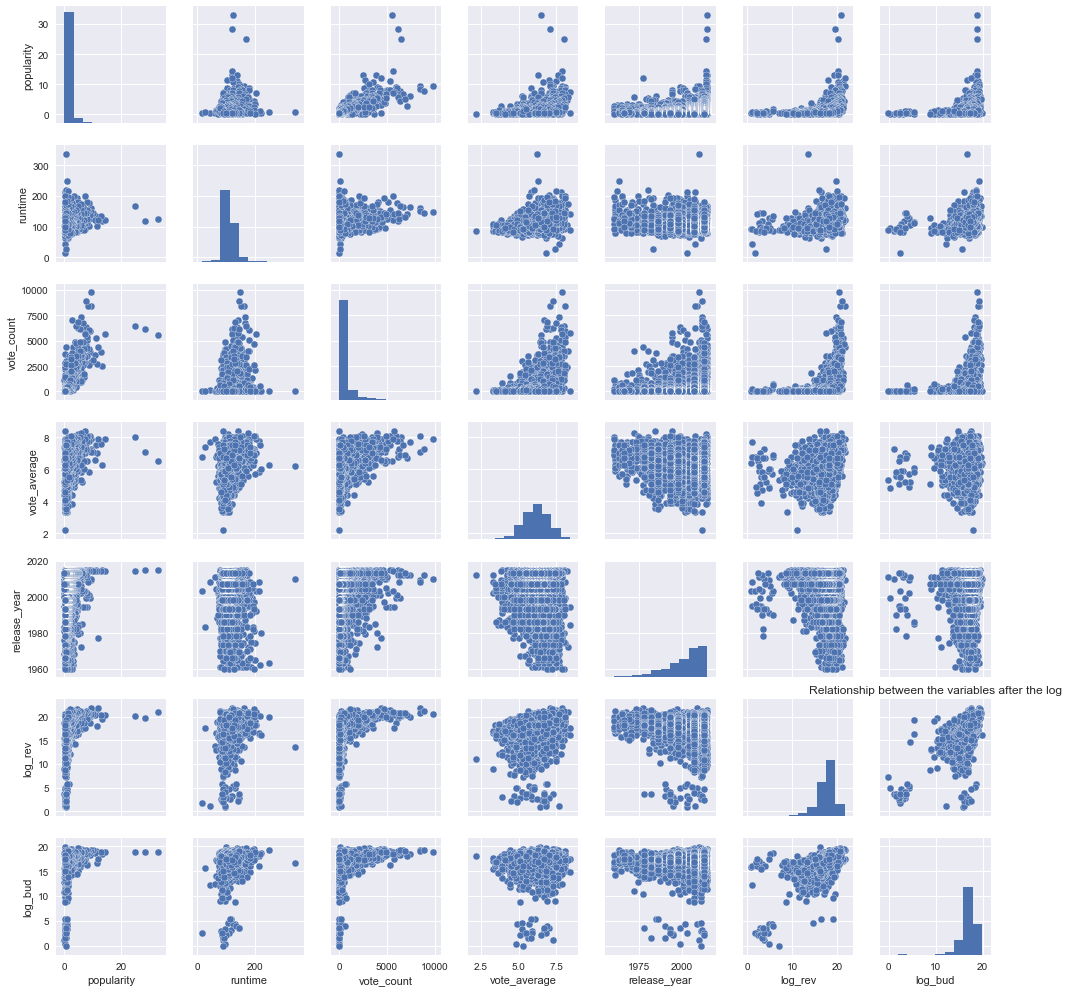

In [28]:
#Use pairplot to review the relationship between the variables after the log
sns.pairplot(df5, size=2);
plt.title("Relationship between the variables after the log");

We find some relationship among the `log_rev` and `log_bud`,and `popularity`
In order to further see the relationship, I try our data to fit a multiple linear regression model 

In [29]:
df5['intercept'] = 1
lm_rev = sms.OLS(df5['log_rev'], df5[['intercept', 'log_bud','popularity']])
results_rev = lm_rev.fit()
results_rev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_rev   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1652.
Date:                Thu, 14 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:24:07   Log-Likelihood:                -7592.4
No. Observations:                3853   AIC:                         1.519e+04
Df Residuals:                    3850   BIC:                         1.521e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8569      0.286      9.986      0.000       2.296       3.418
log_bud        0.8405      0.017     49.142      0.000       0.807       0.874
popularity     0.3160      0.020     16.096      0.000       0.278       0.355
==============================================================================
Omnibus:                     2319.048   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50209.878
Skew:                          -2.458   Prob(JB):                         0.00
Kurtosis:                      19.988   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
Based on the above results, there is a statistical significant evidence that the explanatory varibles `budegt` and `popularity` has a positive relationship with our response varibale `revenue`(p-value=0.000)
Also, 46.2% of our explantory variables could be explained by the model.

<a id='conclusions'></a>
## Conclusions

> Overall, we can see a increase trend regarding the number of the movies being released over the years from the investigated data. There is a positive relationship among the popularity and budget with the revenue of the movie, meaning that more popular and more money spent in creating the film will lead to more revenue of the movie. 
Below are the sub-conculsions I found to answer my research questions I raised before
* We can see a growing trend of the nuble of movies releasing each year and 2014 is the year has the highest release of the movies. 
* Drama genre has the highest release of movies followed by Comedy and Thriller while the Foriegn, Western and TV movies genres have the least release.
* The movie namely'The Story of Film: An Odyssey' has the longest runtime while there are four movies with the shortes runtime with only 2miutes.
* The movieStar War has the highest profit, which is also one of my favorite movies. The movieThe Warrior's Way has the lowest profit, of which I never heard.
* There is a statistical significant evidence that the explanatory varibles budegt and popularity has a positive relationship with our response varibale revenue(p-value=0.000) Also, 46.2% of our explantory variables could be explained by the model.

<a id='limitations'></a>
## Limitations:
* In the data cleaning process, I just dropped all the null data. However, it may have the possiblities that these data could change the trends and pattern of the investigated data. 
* In the data cleaning process, I just dropped all the data whose budgest and revenue is '0'. However, it may have the possiblities that these mistakenly input data could change the trends and pattern of the investigated data. 
* By doing the multiple linear regression, I assumed all the aussmptions of regressions are met. However, we may need more furether information to show the case.